<a href="https://colab.research.google.com/github/Komsomolochka/python_netology/blob/master/spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz

In [19]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

spark-2.4.3-bin-hadoop2.7/
spark-2.4.3-bin-hadoop2.7/python/
spark-2.4.3-bin-hadoop2.7/python/setup.cfg
spark-2.4.3-bin-hadoop2.7/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.3-bin-hadoop2.7/python/pyspark

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
df = spark.read.csv('iris.csv', inferSchema=True, header=True)

In [0]:
df1=df.withColumnRenamed('sepal.length', 'sepal_length').withColumnRenamed('sepal.width', 'sepal_width').withColumnRenamed('petal.length', 'petal_length').withColumnRenamed('petal.width', 'petal_width')

In [81]:
df1.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

In [104]:
df1.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|
|         4.8|        3.0|         1.4|        0.1| Setosa|
|         4.3|        3.0|         1.1| 

In [0]:
### Домашнее задание
# Скачайте dataset iris https://gist.github.com/netj/8836201
# Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
# Визуализируйте точечный график (plt.scatter) по каждой паре параметров
# Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
# Сделайте отдельную колонку для своего предсказания
# Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)

In [85]:
df_min = df1.groupBy('variety').min()
df_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [86]:
df_max = df1.groupBy('variety').max()
df_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [89]:
df_avg = df1.groupBy('variety').avg()
df_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

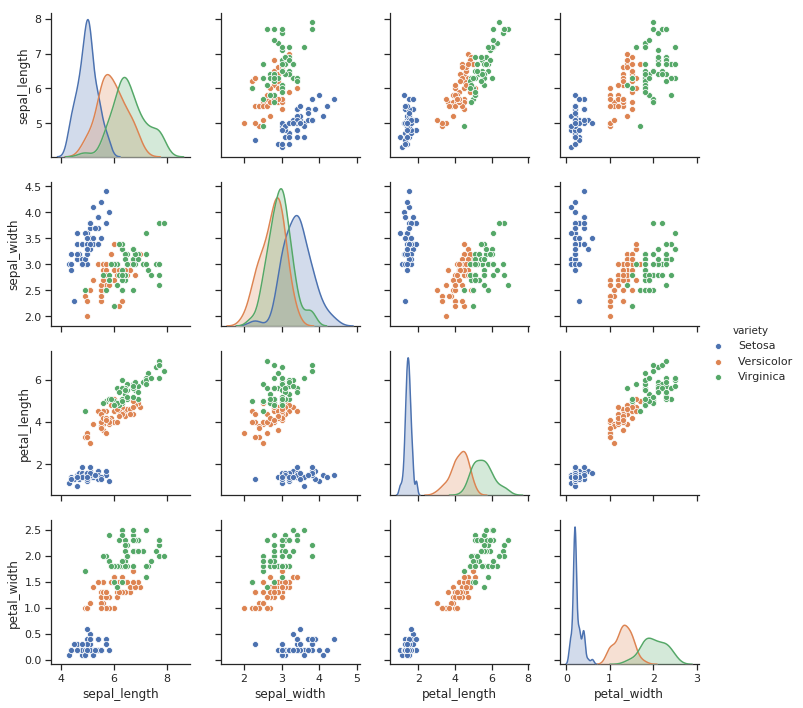

In [98]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
df2 = df1.toPandas()
g = sns.pairplot(df2, hue='variety')

In [0]:
### Предположим, что если petal_length < 2, то ирис относится к типу Setosa


In [112]:
from pyspark.sql.functions import when, lit
df3 = df1.withColumn("type", when((df1['petal_length'] < 2), lit('Setosa')))
df3.show()

+------------+-----------+------------+-----------+-------+------+
|sepal_length|sepal_width|petal_length|petal_width|variety|  type|
+------------+-----------+------------+-----------+-------+------+
|         5.1|        3.5|         1.4|        0.2| Setosa|Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|Setosa|
|         4.8|        3.4|         1.6|        0.2| Setosa|Set

In [122]:
df3.where((df3['variety']=='Setosa')).count()

50

In [124]:
df3.where((df3['type']=='Setosa') & (df3['type']=='Setosa')).count()

50

In [0]:
### 50 из 50 угадано верно